In [2]:
#big terminase fasta: ./data/term_short_nahant_term.fasta
from skbio.alignment import Alignment
from skbio.sequence import Protein
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Make new directory for the latest, most updated version of this tree investigation:

In [5]:
import os
os.mkdir("./data2/")

In [6]:
#align using muscle
!muscle -in ./data/term_short_nahant_term.fasta -out ./data2/tsnt.muscle.fasta


MUSCLE v3.8.31 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.


*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA sequence data, ignored

*** WARNING *** Invalid character '*' in FASTA

In [3]:
aln = Alignment.read(file = "data2/tsnt.muscle.fasta", format="fasta")

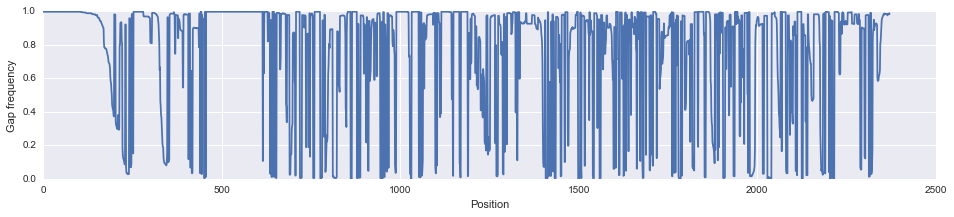

In [4]:
gap_freq = [d["-"] for d in aln.position_frequencies()]
fig, ax = plt.subplots()
fig.set_size_inches([16, 3])
ax.plot(np.arange(len(gap_freq)), gap_freq)
ax.set_xlabel("Position")
ax.set_ylabel("Gap frequency")

In [5]:
keepers, = np.where(np.array(gap_freq)<=0.20)
aln_masked = aln.subalignment(positions_to_keep=keepers)

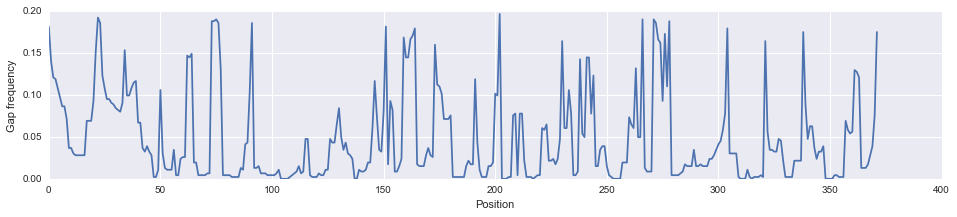

In [6]:
gap_freq2 = [d["-"] for d in aln_masked.position_frequencies()]
fig, ax = plt.subplots()
fig.set_size_inches([16, 3])
ax.plot(np.arange(len(gap_freq2)), gap_freq2)
ax.set_xlabel("Position")
ax.set_ylabel("Gap frequency")

In [7]:
len(aln_masked)

462

In [12]:
aln_masked.write("data2/tsnt.muscle.0.2gap_masked.fasta")
!head -n2 data2/tsnt.muscle.0.2gap_masked.fasta 

>Gj1
IQAELEGQGLENDAVLRSVFRANSEHDNTDELVDKILHDKILMKSEAFGK-VIFNVGQKYSFCHNIITSYAEDVVLESSGYIRAVMMDPLFQPNKRSLERWGTTGKLTGKGAGLLYSGCFVVDDVIKDAYSDTVRAEINDRFDNTFMRLANSYGNQIKCNIPIEKWYDKLPILYNRWPSRKSLESLEAMKESNPYTYQYAGDSQGHGLIKEDWQEYEVFDRIVRSFITADTDYSVLKHWGVTKERDVYCLDIMLGKFETPAIIDFWKCNKLIPRALYMEKSAGQF----RVLPLPRDGI------NGNDKVTRFLNAIPYFQKRIFFHIDHVRRSLGS---GTGHDDCVDNVSDMVA-IEFSGPSANYSAWM


In [14]:
!FastTree <data2/tsnt.muscle.0.2gap_masked.fasta> data2/tsnt.muscle0.2gap_mask.tree

FastTree Version 2.1.8 No SSE3
Alignment: standard input
Amino acid distances: BLOSUM45 Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jones-Taylor-Thorton, CAT approximation with 20 rate categories
Ignored unknown character X (seen 4 times)
Initial topology in 0.37 seconds
Refining topology: 34 rounds ME-NNIs, 2 rounds ME-SPRs, 17 rounds ML-NNIs
Total branch-length 220.238 after 2.83 sec
ML-NNI round 1: LogLk = -241509.985 NNIs 68 max delta 24.21 Time 7.30
Switched to using 20 rate categories (CAT approximation)
Rate categories were divided by 1.096 so that average rate = 1.0
CAT-based log-likelihoods may not be comparable across runs
Use -gamma for approximate but comparable Gamma(20) log-likelihoods
ML-NNI round 2: LogLk = -238090.581 NNIs 39 max delta 6.34 Time 11.63
ML-NNI round 3: LogLk = -238059.481 NNIs 22 max delta 4.22 Time 13.29
ML-NNI round 4: LogLk = -238045.923 

## Begin ete analysis here

In [1]:
from ete3 import TreeNode
t=TreeNode("data2/tsnt.muscle0.2gap_mask.tree")

npinfo=open("/Users/jmb/Desktop/ViralFate/OrthoMCL/tSNE/tSNE_genome_clusters.txt").readlines()
phages=[i.split("\t")[0] for i in npinfo]
groups=[i.split("\t")[-1].replace("\n","") for i in npinfo]
pgs=dict(zip(phages[1:], groups[1:]))


for node in t:
    dbscan=pgs.get(node.name, "NA")
    node.add_feature("dbs",dbscan)


term_types=open("/Users/jmb/Desktop/ViralFate/Terminase/akmk_terminases/terminases-shorty-for-JB_info_added.txt").readlines()
term_types[0:10]
short=[i.split("\t")[0] for i in term_types]
general=[i.split("\t")[-1].replace("\n","") for i in term_types]
specific=[i.split("\t")[-2] for i in term_types]
tt_specific=dict(zip(short, specific))
tt_general=dict(zip(short, general))


for node in t:
    term_gen=tt_general.get(node.name, "nahant/unknown")
    term_specific=tt_specific.get(node.name, "nahant/unknown")
    node.add_features(t_gen=term_gen, t_spec=term_specific)


In [3]:
#iterating over leaves:
from ete3 import Tree, NodeStyle, TreeStyle

ts = TreeStyle()
ts.show_leaf_name = True
ts.mode = "c"            #circular tree

for node in t:
    tcol=tspec_cols.get(node.t_spec,"#FFFFFF")
    nstyle=NodeStyle()
    nstyle["size"]=10
    nstyle["fgcolor"]=tcol
    node.set_style(nstyle)
    
t.show(tree_style=ts)

In [4]:
#color leaves by identified terminase type

from ete3 import Tree, NodeStyle, TreeStyle

ts = TreeStyle()
ts.show_leaf_name = True
ts.mode = "c"            #circular tree

for node in t:
    tcol=tspec_cols.get(node.t_spec,"#FFFFFF")
    nstyle=NodeStyle()
    nstyle["bgcolor"]=tcol
    node.set_style(nstyle)
    
t.show(tree_style=ts)

In [5]:
#color leaves by dbscan group
from ete3 import Tree, NodeStyle, TreeStyle, faces

ts = TreeStyle()
ts.show_leaf_name = True
ts.mode = "c"            #circular tree

for node in t:
    gcol=db_cols.get(node.dbs,"#FFFFFF")
    nstyle=NodeStyle()
    nstyle["bgcolor"]=gcol
    node.set_style(nstyle)
    
t.show(tree_style=ts)

In [6]:
#Add circles to leaf faces colored based on dbscan group 
from ete3 import Tree, NodeStyle, TreeStyle, faces, TreeNode, CircleFace


ts = TreeStyle()
ts.show_leaf_name = True
ts.mode = "c"            #circular tree

tn=TreeNode("data2/tsnt.muscle0.2gap_mask.tree")
t.convert_to_ultrametric()

for node in t:
    node.add_face(CircleFace(radius=12,color=db_cols.get(node.dbs,"#FFFFFF")), 
                  column=1, position="branch-right")

t.show(tree_style=ts)

In [7]:
tn.show()

### Setting up read coverage/genome structure color dictionaries

In [10]:
term_types=open("/Users/jmb/Desktop/ViralFate/Terminase/akmk_terminases/terminases-shorty-for-JB_info_added.txt").readlines()
cov_patterns=open("/Users/jmb/Desktop/ViralFate/ImportantInfo/read_coverage_patterns.txt").readlines()

In [2]:
%reload_ext rpy2.ipython
%R library(dplyr); library(magrittr)

//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)


array(['magrittr', 'dplyr', 'tools', 'stats', 'graphics', 'grDevices',
       'utils', 'datasets', 'methods', 'base'], 
      dtype='|S9')

In [3]:
%%R 
#writing tables with compatable coverage/terminase categories to use to color terminase tree
term_types<-read.table("/Users/jmb/Desktop/ViralFate/Terminase/akmk_terminases/terminases-shorty-for-JB_info_added.txt",sep="\t")

cov_patterns=read.table("/Users/jmb/Desktop/ViralFate/ImportantInfo/read_coverage_patterns.txt", sep="\t",header=TRUE)
head(term_types)

           V1                         V2             V3        V4
1         186   Enterobacteria phage 186     AAC34148.1   3337256
2        7201   Streptococcus phage 7201    NP_038323.1   9634649
3 0305phi8-36 Bacillus phage 0305phi8-36 YP_001429607.1 156564098
4  1102phi1-3  Bacillus phage 1102phi1-3     AAS45252.1  42742386
5        933W  Enterobacteria phage 933W    NP_049511.1   9632517
6          9g    Enterobacteria phage 9g YP_009032373.1 640885123
                                  V5           V6                V7
1                 terminase subunit    Myoviridae not characterized
2                             ORF22  Siphoviridae        3-cos/HK97
3           terminase large subunit    Myoviridae not characterized
4                   large terminase    Myoviridae not characterized
5  putative large subunit terminase   Podoviridae      headful/933W
6           terminase large subunit  Siphoviridae not characterized
                 V8
1 not characterized
2               Cos
3 

In [4]:
%%R
term_types$V8%>%unique%>%print
cov_patterns$cov_category%>%unique%>%print
cov_patterns%>%head

[1] not characterized Cos               Headful           NoGroup          
[5] Mu                DTR              
Levels: Cos DTR Headful Mu NoGroup not characterized
[1] short_internal_peak     mu_pattern              cos_pattern            
[4] long_internal_peak      multiple_coverage_peaks shifts_in_coverage     
[7] even_coverage           no_pattern             
8 Levels: cos_pattern even_coverage long_internal_peak ... short_internal_peak
     phage        cov_category
1 1.005.O. short_internal_peak
2 1.015.O. short_internal_peak
3 1.021.B. short_internal_peak
4 1.021.C. short_internal_peak
5 1.024.O. short_internal_peak
6 1.026.O. short_internal_peak


In [5]:
%%R
color_codes<-read.table("genometype_coverage_color_codes.txt", sep="\t", header=TRUE)
head(color_codes)
color_codes<-color_codes[,c(1:4)]

In [6]:
%%R
term_types$Description<-color_codes$Description[match(term_types$V8, color_codes$original_desc)]
term_types$color<-color_codes$Color[match(term_types$Description, color_codes$Description)]
head(term_types)

           V1                         V2             V3        V4
1         186   Enterobacteria phage 186     AAC34148.1   3337256
2        7201   Streptococcus phage 7201    NP_038323.1   9634649
3 0305phi8-36 Bacillus phage 0305phi8-36 YP_001429607.1 156564098
4  1102phi1-3  Bacillus phage 1102phi1-3     AAS45252.1  42742386
5        933W  Enterobacteria phage 933W    NP_049511.1   9632517
6          9g    Enterobacteria phage 9g YP_009032373.1 640885123
                                  V5           V6                V7
1                 terminase subunit    Myoviridae not characterized
2                             ORF22  Siphoviridae        3-cos/HK97
3           terminase large subunit    Myoviridae not characterized
4                   large terminase    Myoviridae not characterized
5  putative large subunit terminase   Podoviridae      headful/933W
6           terminase large subunit  Siphoviridae not characterized
                 V8 Description     color
1 not characterized 

In [7]:
%%R
cov_patterns$Description<-color_codes$Description[match(cov_patterns$cov_category, color_codes$original_desc)]
cov_patterns$color<-color_codes$Color[match(cov_patterns$Description, color_codes$Description)]

head(cov_patterns)

     phage        cov_category   Description     color
1 1.005.O. short_internal_peak internal peak "#9EFAC3"
2 1.015.O. short_internal_peak internal peak "#9EFAC3"
3 1.021.B. short_internal_peak internal peak "#9EFAC3"
4 1.021.C. short_internal_peak internal peak "#9EFAC3"
5 1.024.O. short_internal_peak internal peak "#9EFAC3"
6 1.026.O. short_internal_peak internal peak "#9EFAC3"


In [8]:
%%R
tt_cc<-term_types[,c(1,9,10)]

In [9]:
%Rpull tt_cc
%Rpull cov_patterns

#for previously sequenced phages, some with known genome structure
kdict={}

for i in range(1,len(tt_cc)):
    kdict[tt_cc['V1'][i]]=(tt_cc["color"][i].replace('"',''), tt_cc["Description"][i])

#kdict[tt_cc['V1']]=(tt_cc['color'],tt_cc['Description'])

#for observed coverage patterns
cp=cov_patterns

cpdict={}
for i in range(1, len(cp)):
    cpdict[cp['phage'][i]]=(cp['color'][i].replace('"',''), cp['Description'][i])

In [69]:
t=TreeNode("data2/tsnt.muscle0.2gap_mask.tree")

npinfo=open("/Users/jmb/Desktop/ViralFate/OrthoMCL/tSNE/tSNE_genome_clusters.txt").readlines()
phages=[i.split("\t")[0] for i in npinfo]
groups=[i.split("\t")[-1].replace("\n","") for i in npinfo]
pgs=dict(zip(phages[1:], groups[1:]))


for node in t:
    dbscan=pgs.get(node.name, "NA")
    node.add_feature("dbs",dbscan)


term_types=open("/Users/jmb/Desktop/ViralFate/Terminase/akmk_terminases/terminases-shorty-for-JB_info_added.txt").readlines()
term_types[0:10]
short=[i.split("\t")[0] for i in term_types]
general=[i.split("\t")[-1].replace("\n","") for i in term_types]
specific=[i.split("\t")[-2] for i in term_types]
tt_specific=dict(zip(short, specific))
tt_general=dict(zip(short, general))


for node in t:
    term_gen=tt_general.get(node.name, "nahant/unknown")
    term_specific=tt_specific.get(node.name, "nahant/unknown")
    node.add_features(t_gen=term_gen, t_spec=term_specific)


#setting colors
gen_tt=set()
spec_tt=set()

for node in t:
    gen_tt.add(node.t_gen)
    spec_tt.add(node.t_spec)
print len(gen_tt)
print len(spec_tt)

hues=["#C44F36",
"#8FD749",
"#6771C7",
"#8ECCD0",
"#CAA540",
"#503B25",
"#CA4B7D",
"#C49E86",
"#577D3D",
"#C155C8",
"#583055",
"#516D7B",
"#8ED697",
"#C09DC9"]


tgen_cols=dict(zip(list(gen_tt), hues))
tspec_cols=dict(zip(list(spec_tt),hues))
non_descript=["not characterized","NoGroup"]
for n in non_descript:
    tspec_cols[n]="#808080"

tspec_cols["nahant/unknown"]="#FFFFFF"

hue36=["#D2ADD5",
"#68E154",
"#DD4C2A",
"#2F3A2E",
"#CB51D7",
"#73D9D1",
"#DDCE45",
"#893255",
"#E1B48A",
"#706AD3",
"#A96F29",
"#66DC9A",
"#392D54",
"#D23D91",
"#DA425D",
"#598F76",
"#859239",
"#8C2D24",
"#CACFC5",
"#9C7B84",
"#BFD89C",
"#CC7DCC",
"#65421F",
"#7AB3D0",
"#4BA03B",
"#793F85",
"#6784C7",
"#CF755E",
"#AEE035",
"#4A6379",
"#3D5E26",
"#D67791",
"#4F262C",
"#BADB6F",
"#907F58",
"#DF9E37"]

db_groups=set()

for node in t:
    db_groups.add(node.dbs)
db_cols=dict(zip(db_groups, hue36))

db_cols['NA']="#FFFFFF"
db_cols['0']="808080"

7
14


In [71]:
#Add circles to leaf faces colored based on dbscan group 
from ete3 import Tree, NodeStyle, TreeStyle, faces, TreeNode, RectFace, CircleFace


ts = TreeStyle()
ts.show_leaf_name = False
ts.mode = "c"   #circular tree
ts.optimal_scale_level="full" 



t.convert_to_ultrametric()

for node in t:
    if node.name in kdict.keys():
        known_col=kdict.get(node.name)[0]
        if known_col!="#FFFFFF":
            node.add_face(RectFace(width=16,height=14,fgcolor=known_col, bgcolor=known_col),
                      column=0, position="branch-right")
            nstyle=NodeStyle()
            nstyle["bgcolor"]=known_col
            node.set_style(nstyle)
            #node.add_face(CircleFace(radius=6,color=known_col),
            #          column=0, position="branch-right")
    elif node.name in cpdict.keys():
        cov_col=cpdict.get(node.name)[0]
        node.add_face(RectFace(width=16,height=14,fgcolor=cov_col, bgcolor=cov_col), 
                  column=0, position="branch-right")   
        nstyle=NodeStyle()
        nstyle["bgcolor"]=cov_col
        node.set_style(nstyle)
'''    
for node in t:
    gcol=db_cols.get(node.dbs,"#FFFFFF")
    nstyle=NodeStyle()
    nstyle["bgcolor"]=gcol
    node.set_style(nstyle)
''' 
t.show(tree_style=ts)

In [72]:
t.render("terminase_tree_ete3.pdf", tree_style=ts)

{'faces': [[1626.180607991112,
   1906.1185044037522,
   1646.7391405520607,
   1927.2142087626812,
   140,
   None],
  [1637.8135857671455,
   1898.099685813773,
   1658.4436953619347,
   1919.229257446904,
   139,
   None],
  [1660.7543345801832,
   1881.5968418418709,
   1681.5162022753364,
   1902.7824834105027,
   137,
   None],
  [1649.3388679126222,
   1889.9252971208516,
   1670.0367600412312,
   1911.084849662015,
   138,
   None],
  [1668.826376171729,
   207.81171140466623,
   1689.6315325184785,
   229.01357702390965,
   747,
   None],
  [1265.893357891588,
   2062.322086171962,
   1282.979239493615,
   2080.9362319262027,
   182,
   None],
  [1833.4271886855045,
   362.4238704995199,
   1854.686479098839,
   383.4676369661669,
   784,
   None],
  [1578.6148225359068,
   1936.6090145475798,
   1598.8493756819348,
   1957.5305214296106,
   144,
   None],
  [1614.4420742403588,
   1913.9802779879456,
   1634.9252484326232,
   1935.038234935717,
   141,
   None],
  [925.034004

In [43]:
from cogent.draw import dendrogram
from cogent import LoadTree

In [64]:
tree = LoadTree("data2/tsnt.muscle0.2gap_mask.tree")
dendrogram=UnrootedDendrogram(tree)
names=tree.getNodeNames()
names_nodes=tree.getNodesDict()
names_nodes['P22']

cogent.draw.dendrogram.UnrootedDendrogram